# Monte Carlo repumping dynamics simulation

This notebook runs Monte-Carlo code for simulating the repump dynamics of the NV centre. This includes the different relevant ground and excited states of the NV, as well as the singlet state (which is modelled here as a single level).

The simulated levels are:

| P | ground state ms = +1 |
| M | ground state ms = -1 |
| Z | ground state ms = 0  |
| S | singlet state |
| E1 | excited state |
| E2 | excited state |

E1,E2 can either represent the E1,E2 levels or the A1,A2 levels, depending on specified transition rates.

Note that this code does not include coherent quantum dynamics.

The code is based on a a general cython code written for fast simulation of population dynamics of a system (pop_montecarlo_c)/


In [11]:
import monteCarlo_repumping as mcr; reload(mcr)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Single cycle

Lets first simulate a single optical cycle, in which we instaneously excited the NV to its excited state, and then look to see how it decays.

The first plot shows the populations right after repumping stops, while the second shows the populations after the singlet state finishes decaying

Final pops before decay from singlet:  [ 0.023  0.624  0.236  0.117  0.     0.   ]
Final pops after decay from singlet:  [ 0.032  0.634  0.334  0.     0.     0.   ]


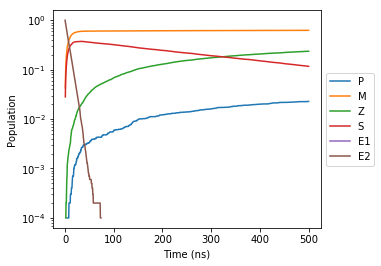

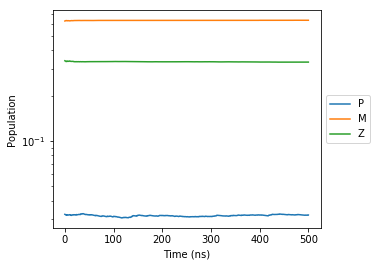

In [10]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.drive = 0
rmc.init_state = 5
rmc.S_lifetime = 400.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([0.594332,0.00,0.0,0.406,0.0,0.0])
E2_branching_raw = np.array([0.0,0.594332,0.0,0.406,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 7.34/np.sum(E1_branching_raw)
rmc.E2_lifetime = 7.34/np.sum(E2_branching_raw)
S_branching = 0.84
rmc.S_branching = mcr.normalized([(1-S_branching)/2,(1-S_branching)/2,S_branching,0,0,0])

rmc.time_duration = 500
rmc.dt = 0.5
rmc.repetitions = 10000
rmc.run(print_end_pops = True,log_plot=True,do_fit='before_decay',invert_Z = False)
    

## Repumping

Now we start in the ms=-1 state and will continue applying our repumping optical field for 2 microseconds

Final pops before decay from singlet:  [ 0.002  0.002  0.996  0.001  0.     0.   ]
Final pops after decay from singlet:  [ 0.002  0.002  0.997  0.     0.     0.   ]


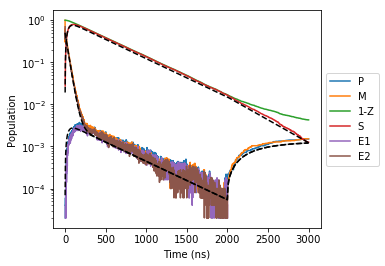

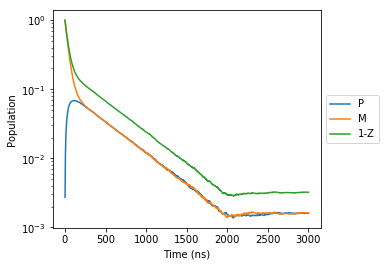

In [5]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.drive = 1
rmc.drive_time = 2000

rmc.init_state = 1
rmc.S_lifetime = 400.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([0.594332,0.00,0.0,0.406,0.0,0.0])
E2_branching_raw = np.array([0.0,0.594332,0.0,0.406,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 7.34/np.sum(E1_branching_raw)
rmc.E2_lifetime = 7.34/np.sum(E2_branching_raw)
S_branching = 0.84
rmc.S_branching = mcr.normalized([(1-S_branching)/2,(1-S_branching)/2,S_branching,0,0,0])

rmc.time_duration = 3000
rmc.dt = 0.7
rmc.repetitions = 50000

rmc.run(print_end_pops = True,log_plot=True,invert_Z = True,plot_model=True)
    

How long on average does it take us to repump (ie end up in the Z state)?

In [21]:
avgRepumpTime=np.sum(rmc.t_array[:-1]*(-np.diff(rmc.mean_populations[:,3])))

print avgRepumpTime

471.370354
